# PS 7 (Jugal Marfatia)

## Question 2

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF6-5.csv')

## Multiplying AVGSALRY by 100,000 for readability.

In [2]:
df['AVGSALRY'] = df['AVGSALRY']*100000

## Set x* = mean(ATTEND) 

## Implies treated = 1 if  ATTEND >= x* and 0 otherwise

In [3]:
df['ATTEND_Treat'] = (df['ATTEND'] >= df['ATTEND'].mean()).astype(int)

In [4]:
df.head()

,YEARID,TEAM,AVGSALRY,ALLSTARS,ATTEND,WINS,TI,ATTEND_Treat
0,1997,1,100437.0,1,1976886.0,84,5,0
1,1998,1,121414.7,2,2376783.0,85,5,1
2,1999,1,138470.4,1,2324943.0,69,5,1
3,2000,1,171547.2,2,2170233.0,81,5,0
4,2001,1,158450.6,2,2248722.0,75,5,1


## I set the bandwidth = standard deviation of ATTEND.

### Below is the range of bandwith

In [5]:
df['ATTEND'].mean() - df['ATTEND'].std(),  df['ATTEND'].std() + df['ATTEND'].mean()

(1758897.2534016445, 2648661.6696752785)

## Create two dataframes that upper and lower that include only observations in the bandwidth

In [6]:
df_upper = df[(df['ATTEND_Treat'] ==1) &  ( df['ATTEND'] < df['ATTEND'].std() + df['ATTEND'].mean())]
df_lower = df[(df['ATTEND_Treat'] ==0) &  ( df['ATTEND'] > df['ATTEND'].mean() - df['ATTEND'].std())]

## Kernel estimation using th formula in notes. 

In [7]:
df_upper['AVGSALRY'].sum() / df_upper['ATTEND'].sum() - df_lower['AVGSALRY'].sum() / df_lower['ATTEND'].sum()

0.007021100854385398

## Local linear estimation.


In [8]:
import statsmodels.api as sm

df1 = df_upper.append(df_lower)
exog_vars = ['ATTEND_Treat', 'ATTEND']
exog = sm.add_constant(df1[exog_vars])

mod = sm.OLS(df1['AVGSALRY'],  exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVGSALRY   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     25.39
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           6.43e-11
Time:                        13:04:06   Log-Likelihood:                -3719.3
No. Observations:                 305   AIC:                             7445.
Df Residuals:                     302   BIC:                             7456.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.765e+04   4.27e+04     -2.053   

## Local linear estimation with interaction for x_i


In [9]:
df1['ATTEND_upper'] = df1['ATTEND'] * (df1['ATTEND_Treat'])
df1['ATTEND_lower'] = df1['ATTEND'] * (df1['ATTEND_Treat'] != 1)

exog_vars = ['ATTEND_Treat',  'ATTEND_upper', 'ATTEND_lower']
exog = sm.add_constant(df1[exog_vars])

mod = sm.OLS(df1['AVGSALRY'],  exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVGSALRY   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           9.15e-11
Time:                        13:04:06   Log-Likelihood:                -3717.8
No. Observations:                 305   AIC:                             7444.
Df Residuals:                     301   BIC:                             7459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.937e+04   5.47e+04     -0.537   

## Polynomial  estimation


In [10]:
df1['ATTEND_sq'] = df1['ATTEND']**2
exog_vars = ['ATTEND_Treat', 'ATTEND', 'ATTEND_sq']
exog = sm.add_constant(df1[exog_vars])

mod = sm.OLS(df1['AVGSALRY'],  exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVGSALRY   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     17.49
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.72e-10
Time:                        13:04:06   Log-Likelihood:                -3718.5
No. Observations:                 305   AIC:                             7445.
Df Residuals:                     301   BIC:                             7460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.961e+05    2.3e+05      0.854   

## Local linear estimation with interaction for x_i


In [11]:
df1['ATTEND_sq_upper'] = df1['ATTEND_sq'] * (df1['ATTEND_Treat'])
df1['ATTEND_sq_lower'] = df1['ATTEND_sq'] * (df1['ATTEND_Treat'] != 1)

exog_vars = ['ATTEND_Treat', 'ATTEND_sq_upper', 'ATTEND_sq_lower',  'ATTEND_upper', 'ATTEND_lower']
exog = sm.add_constant(df1[exog_vars])

mod = sm.OLS(df1['AVGSALRY'],  exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVGSALRY   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     17.94
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           9.71e-11
Time:                        13:04:06   Log-Likelihood:                -3717.9
No. Observations:                 305   AIC:                             7444.
Df Residuals:                     301   BIC:                             7459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.479e-09   3.98e-08     

## Plot the data with vertical line for cutoff i.e. x*

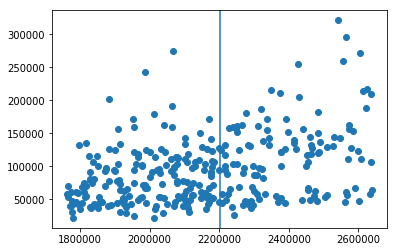

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df1['ATTEND'], df1['AVGSALRY'])
plt.axvline(x=df['ATTEND'].mean())

## As we can see in the above graph there is no regression discontinuity at the mean and therefore there is no economic or statistically significant impact of attendance on average salary in any of the regressions.